In [ ]:
import cx_Oracle
import datetime
import ora_conf 
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import matplotlib.lines as mlines
import numpy as np

import seaborn as sns

%matplotlib inline
def rows_to_dict_list(cursor):
    columns = [i[0] for i in cursor.description]
    return [dict(zip(columns, row)) for row in cursor.fetchmany()]

connstr=ora_conf.connection_string()
conn = cx_Oracle.connect(connstr, threaded = True)
cur = conn.cursor()

In [2]:
df = pd.read_sql(sql='''select * from tmp_turo''', con=conn)
df['money']=df['DETAILS_TRIPS']*df['CURRENCY_VALUE']
t = df['MAKE_MODEL'].str.split(' ',1, expand=True).rename(columns={0:'MAKE', 1:'MODEL'})
t2 = pd.concat([df, t], axis=1)
t2=t2.drop(['MAKE_MODEL', 'URL', 'INTERVAL_TYPE'], axis=1)

t2.sort_values('money', ascending = False).head(15)

,ID,VEHICLE_YEAR,DETAILS_TRIPS,CURRENCY_VALUE,money,MAKE,MODEL
453,399,2013,154,187,28798,PORSCHE,911
230,28,2014,177,162,28674,JAGUAR,F-TYPE
516,462,2016,136,162,22032,TESLA,MODEL S
40,176,2004,249,76,18924,BMW,3 SERIES
328,126,2016,112,152,17024,MASERATI,GHIBLI
320,118,2017,80,199,15920,TESLA,MODEL S
449,395,2016,112,139,15568,TESLA,MODEL S
599,545,2017,42,339,14238,LAND-ROVER,RANGE ROVER SPORT
301,99,2017,33,430,14190,DODGE,CHALLENGER
622,568,2017,151,89,13439,TOYOTA,RAV4


In [3]:
df[['DETAILS_TRIPS']].sum()

DETAILS_TRIPS    15916
dtype: int64

In [4]:
df[['DETAILS_TRIPS']].mean()

DETAILS_TRIPS    19.994975
dtype: float64

In [5]:
df_m = df.groupby(['VEHICLE_YEAR'])['DETAILS_TRIPS'].mean()
df_m.head()
df_m2 = df.groupby(['VEHICLE_YEAR'])['CURRENCY_VALUE'].mean()
df_m3 = df.groupby(['VEHICLE_YEAR'])['CURRENCY_VALUE'].count()
df_m4 = df.groupby(['VEHICLE_YEAR'])['money'].sum()

df_m3=df_m3.to_frame()
df_m3=df_m3.rename(columns={'CURRENCY_VALUE':'CNT'})
ax = pd.concat([df_m, df_m2, df_m3, df_m4], axis=1)
ax
#df_m3

,DETAILS_TRIPS,CURRENCY_VALUE,CNT,money
VEHICLE_YEAR,,,,
1971,0.000000,375.000000,1,0
1976,4.000000,214.000000,1,856
1994,14.000000,149.000000,1,2086
2004,158.666667,58.000000,3,32759
2005,44.500000,66.600000,10,22173
2006,15.900000,55.350000,20,15682
2007,31.812500,51.062500,32,38485
2008,52.371429,60.000000,35,84178
2009,22.968750,108.093750,32,36408


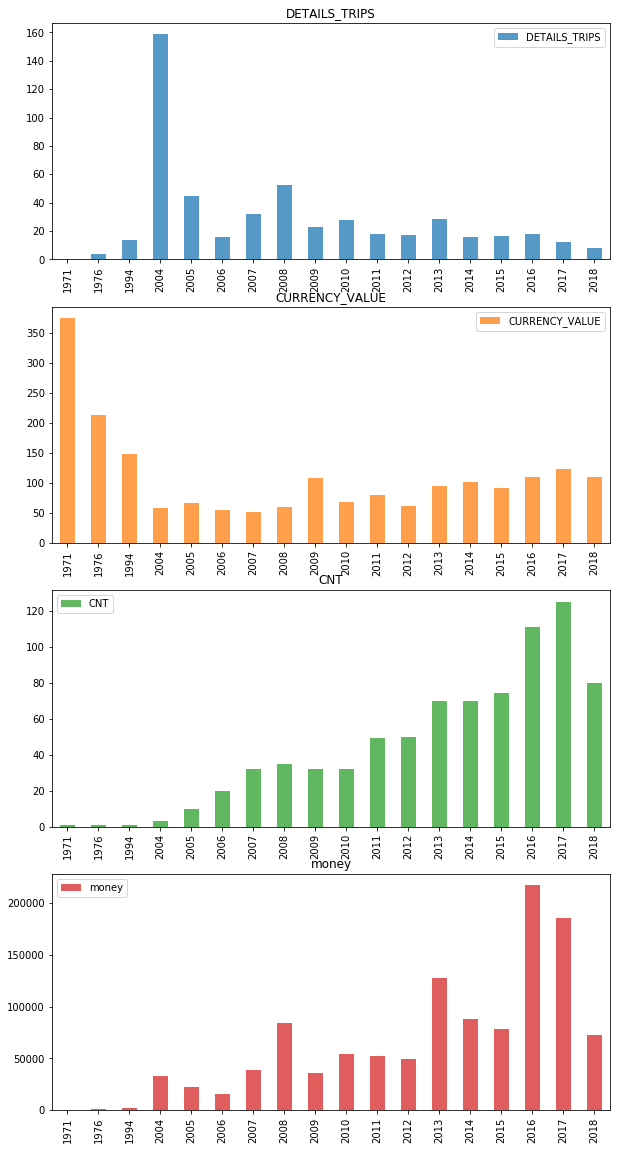

In [6]:
fig_y=ax.plot.bar(figsize=(10,20),rot=90, subplots=True, alpha=0.75)
for a in fig_y:
    for k in a.get_xticklabels():
        k.set_visible(True)
plt.xlabel("")
plt.show()
#pass

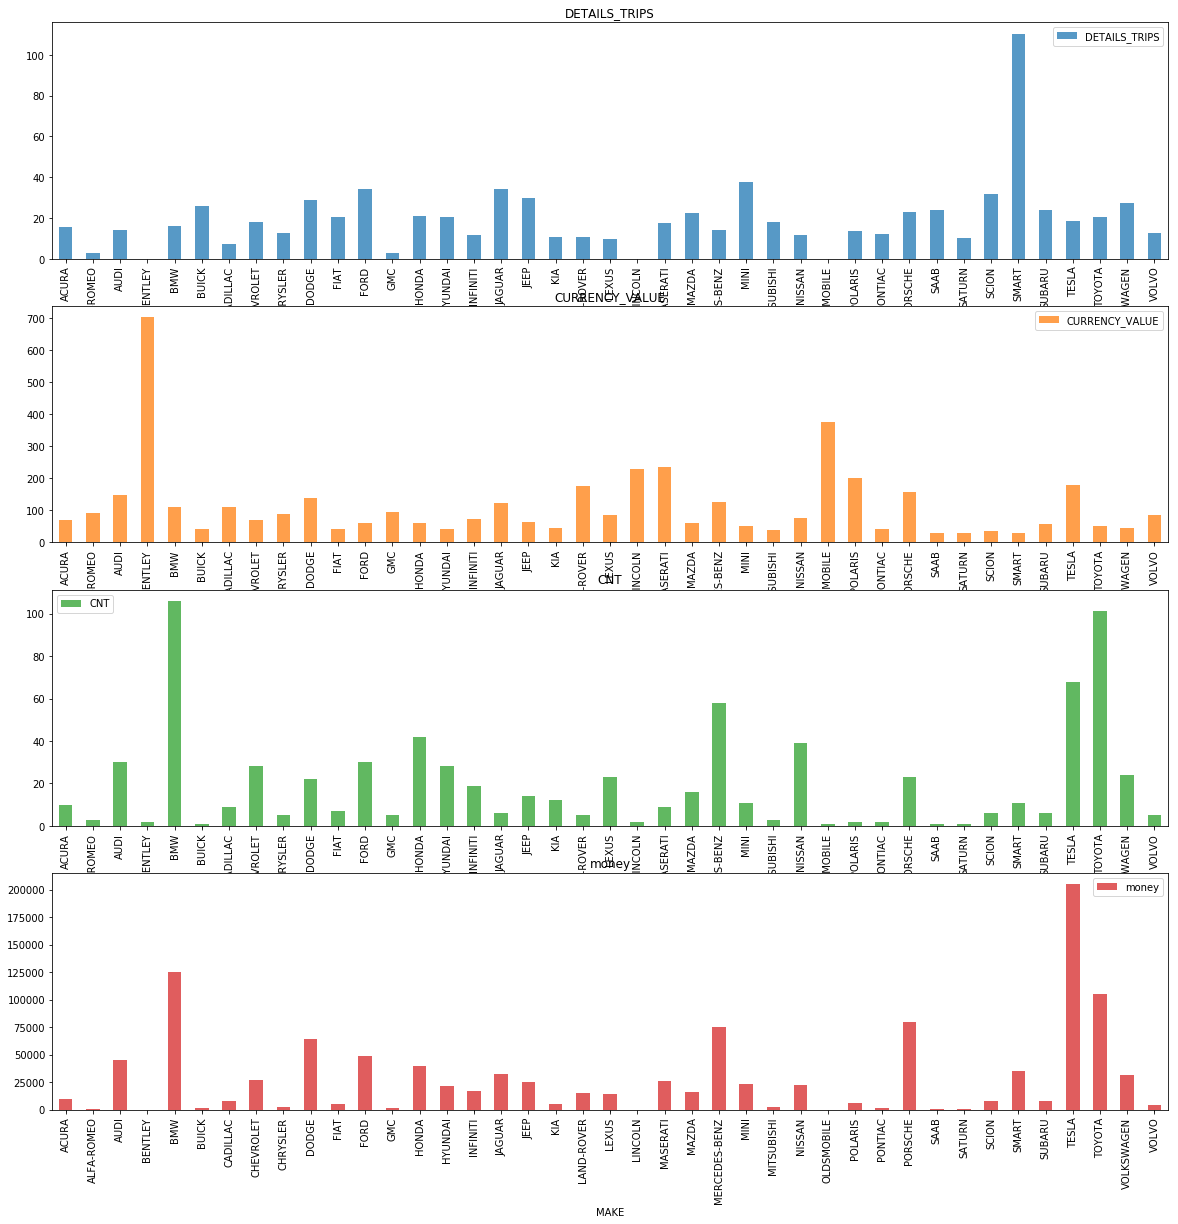

In [7]:
df_g = t2.groupby(['MAKE'])['DETAILS_TRIPS'].mean()
df_g2 = t2.groupby(['MAKE'])['CURRENCY_VALUE'].mean()
#df_g.head()

df_g3 = t2.groupby(['MAKE'])['CURRENCY_VALUE'].count()
df_g4 = t2.groupby(['MAKE'])['money'].sum()

df_g3=df_g3.to_frame()
df_g3=df_g3.rename(columns={'CURRENCY_VALUE':'CNT'})
ax2 = pd.concat([df_g, df_g2, df_g3, df_g4], axis=1)
ax2.head()

fig = ax2.plot.bar(figsize=(20,20),rot=90, subplots=True, alpha=0.75)
for a in fig:
    for k in a.get_xticklabels():
        k.set_visible(True)

Text(0.5,1,'всего денег собрано в категории')

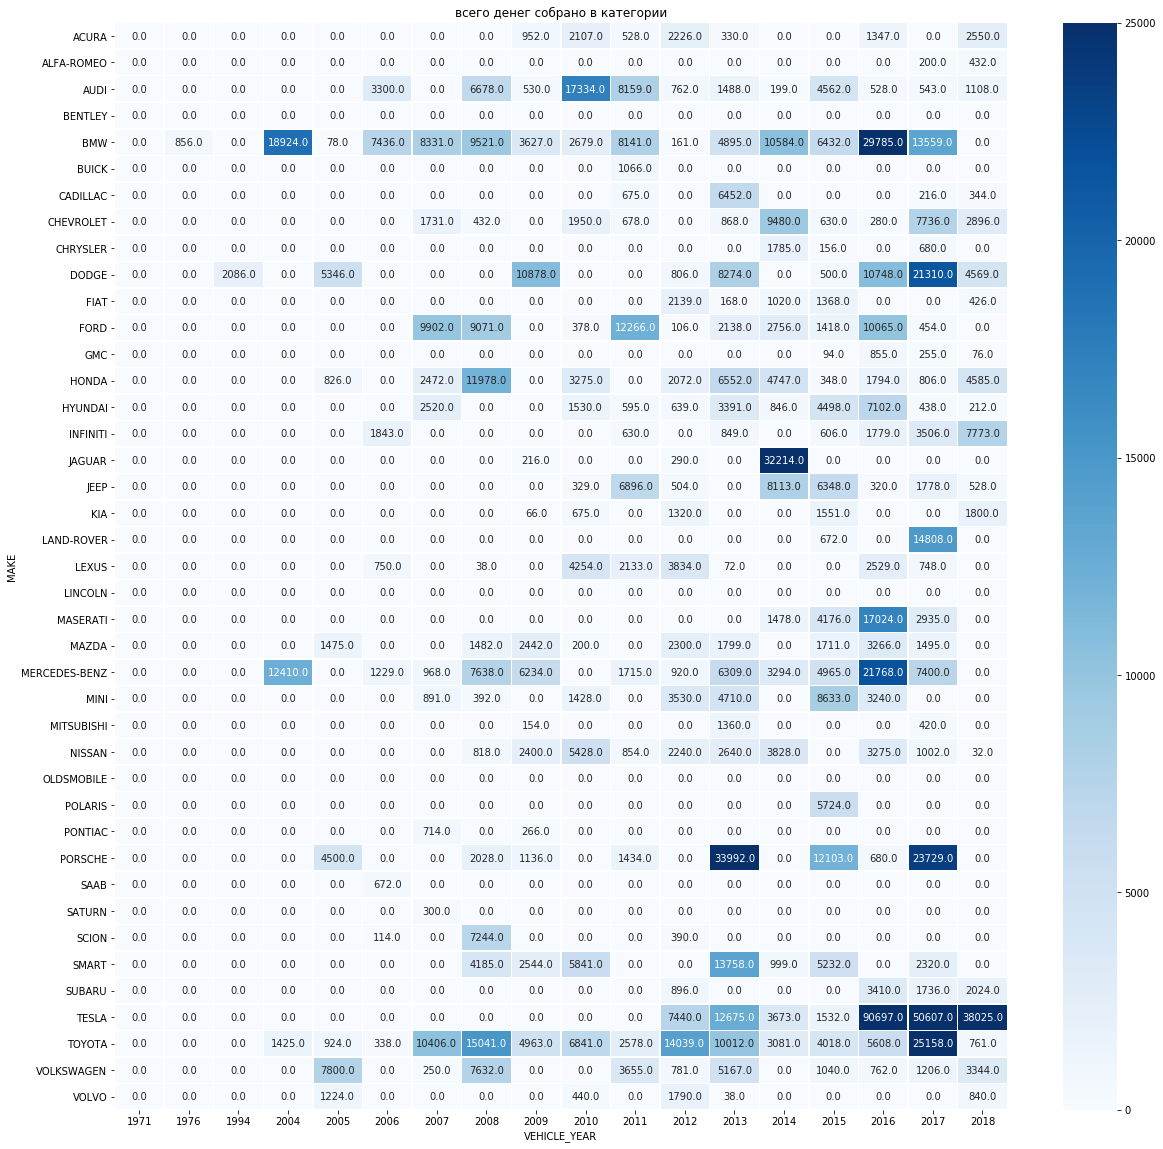

In [8]:
platform_genre_sales = t2.pivot_table(
                        index='MAKE', 
                        columns='VEHICLE_YEAR', 
                        values='money', 
                        aggfunc=sum).fillna(0).applymap(float)
plt.figure(figsize = (20,20))
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5, vmin=0, vmax=25000, cmap="Blues")
plt.title('всего денег собрано в категории')

Text(0.5,1,'всего машин в категории')

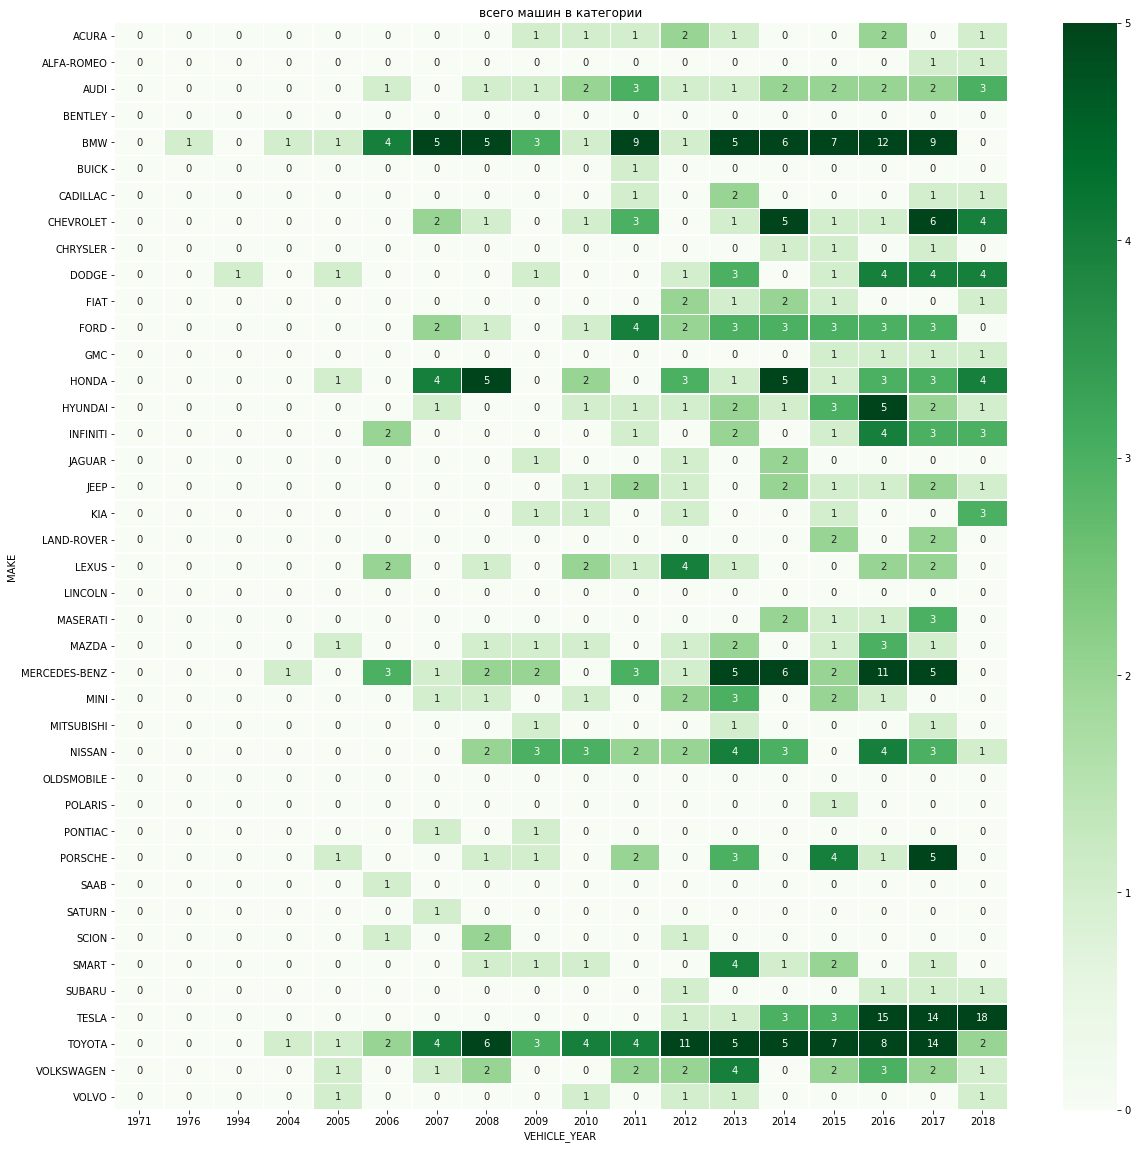

In [9]:
t2_pivot_cnt = t2.pivot_table(
                        index='MAKE', 
                        columns='VEHICLE_YEAR', 
                        values='money', 
                        aggfunc=np.count_nonzero).fillna(0).applymap(float)
plt.figure(figsize = (20,20))
sns.heatmap(t2_pivot_cnt, cmap="Greens", annot=True, linewidths=.5, vmax=5)
plt.title('всего машин в категории')

Text(0.5,1,'средняя цена аренды в категории')

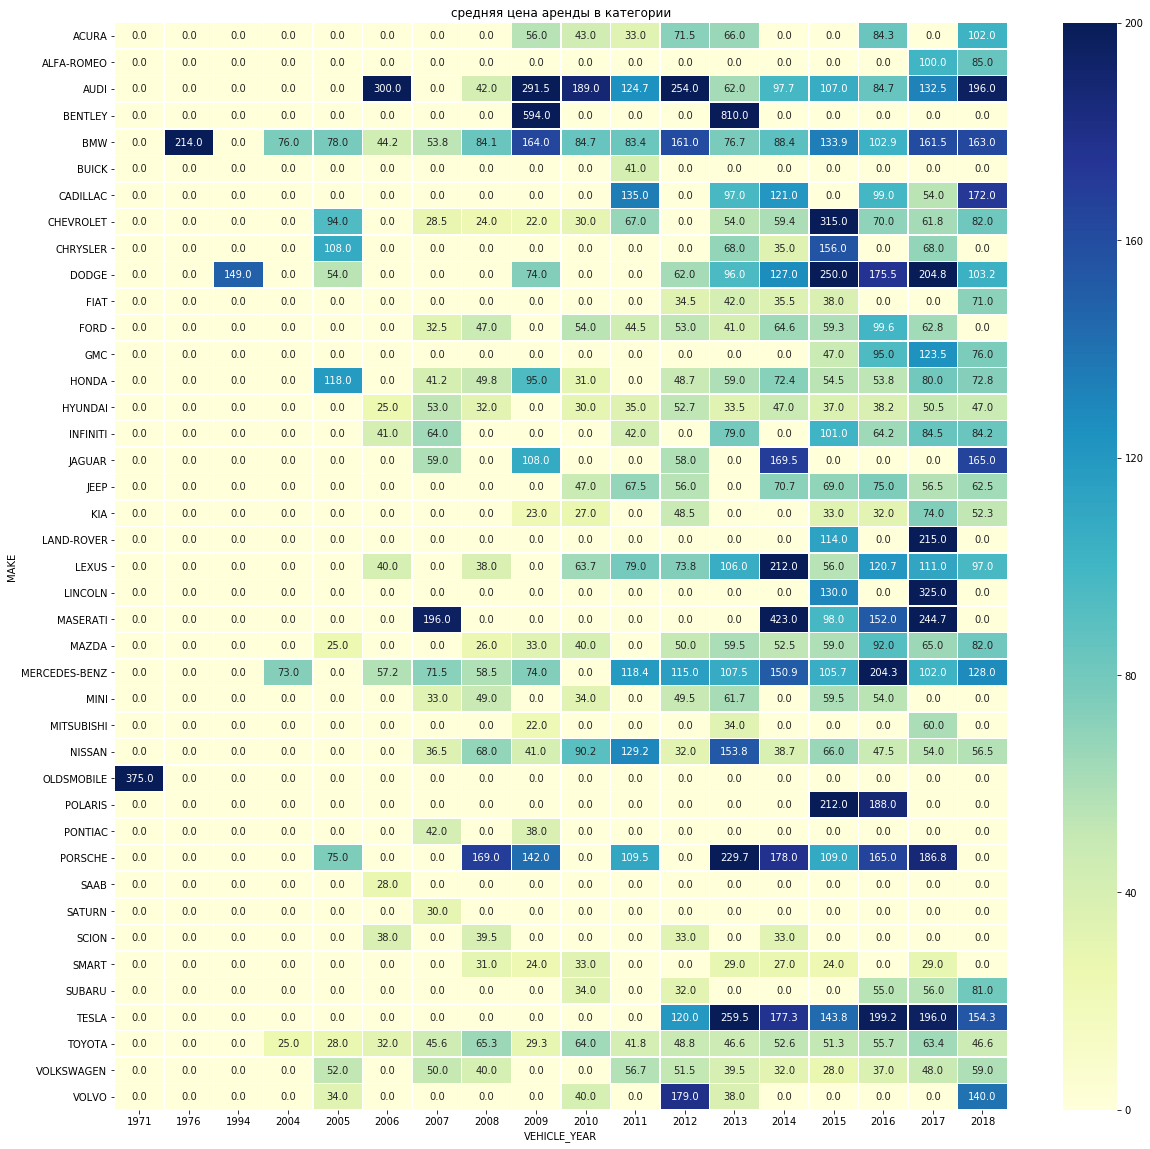

In [10]:
t3_pivot_avgp = t2.pivot_table(
                        index='MAKE', 
                        columns='VEHICLE_YEAR', 
                        values='CURRENCY_VALUE', 
                        aggfunc=np.mean).fillna(0).applymap(float)
plt.figure(figsize = (20,20))
sns.heatmap(t3_pivot_avgp, cmap="YlGnBu", annot=True, fmt=".1f", linewidths=.5, vmax=200)
plt.title('средняя цена аренды в категории')

Text(0.5,1,'')

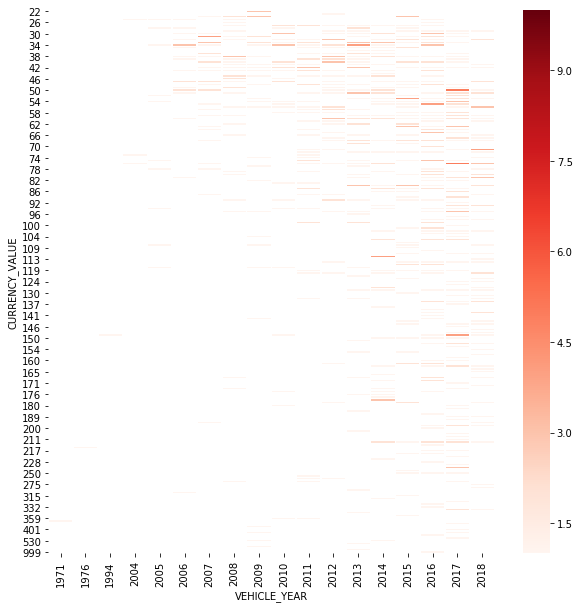

In [79]:
t3_pivot_avgp = t2.pivot_table(
                        index='CURRENCY_VALUE', 
                        columns='VEHICLE_YEAR', 
                        values='MAKE', 
                        aggfunc=np.count_nonzero)
plt.figure(figsize = (10,10))
sns.heatmap(t3_pivot_avgp, cmap="Reds", linewidths=.5, vmax=10)
plt.title('')

In [78]:
t2.shape
d2=t2.drop(['ID', 'money','DETAILS_TRIPS'], axis=1)
d2.describe()

,VEHICLE_YEAR,CURRENCY_VALUE
count,796.000000,796.000000
mean,2013.461055,95.766332
std,4.139971,87.786896
min,1971.000000,22.000000
25%,2011.000000,43.000000
50%,2014.000000,68.000000
75%,2017.000000,118.000000
max,2018.000000,999.000000


In [52]:
categorical_columns = [c for c in d2.columns if d2[c].dtype.name == 'object']
numerical_columns   = [c for c in d2.columns if d2[c].dtype.name != 'object']
print('cat', categorical_columns)
print('num', numerical_columns)

cat ['MAKE', 'MODEL']
num ['VEHICLE_YEAR', 'CURRENCY_VALUE']


/home/greed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


,VEHICLE_YEAR,CURRENCY_VALUE
count,796.000000,796.000000
mean,2013.461055,95.766332
std,4.139971,87.786896
min,1971.000000,22.000000
25%,2011.000000,43.000000
50%,2014.000000,68.000000
75%,2017.000000,118.000000
max,2018.000000,999.000000


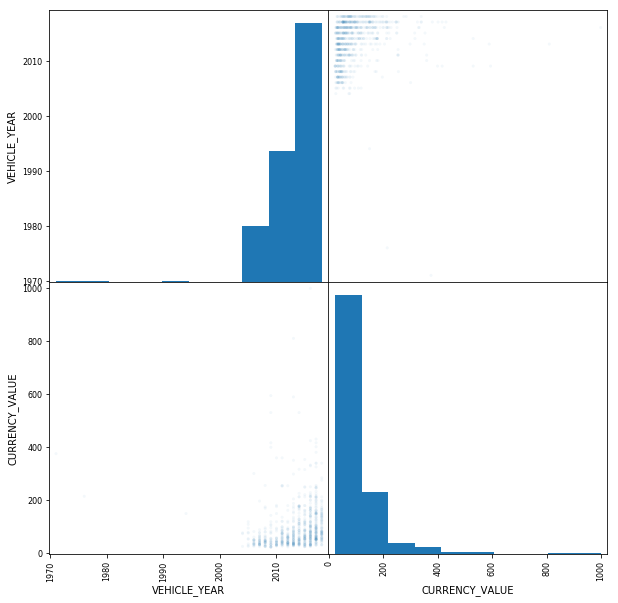

In [53]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(d2, alpha=0.05, figsize=(10, 10));
d2.corr()
d2.describe(include=[object])
d2.describe()

In [54]:
d2[categorical_columns]
data_describe = d2.describe(include=[object])
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]


data_nonbinary = pd.get_dummies(t2[nonbinary_columns])
data_numerical = d2[numerical_columns]
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()

data = pd.concat((data_numerical, data_nonbinary), axis=1)
y = data['CURRENCY_VALUE']
X = data.drop(('CURRENCY_VALUE'), axis=1)
X.describe()

,VEHICLE_YEAR,MAKE_ACURA,MAKE_ALFA-ROMEO,MAKE_AUDI,MAKE_BENTLEY,MAKE_BMW,MAKE_BUICK,MAKE_CADILLAC,MAKE_CHEVROLET,MAKE_CHRYSLER,...,MODEL_X6,MODEL_XC60,MODEL_XD,MODEL_XF,MODEL_XK-SERIES,MODEL_XTERRA,MODEL_XTS,MODEL_YARIS,MODEL_YUKON XL,MODEL_Z4
count,7.960000e+02,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,...,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000
mean,-2.485519e-14,0.012563,0.003769,0.037688,0.002513,0.133166,0.001256,0.011307,0.035176,0.006281,...,0.002513,0.002513,0.002513,0.002513,0.001256,0.002513,0.002513,0.011307,0.001256,0.002513
std,1.000000e+00,0.111448,0.061314,0.190561,0.050094,0.339967,0.035444,0.105796,0.184340,0.079056,...,0.050094,0.050094,0.050094,0.050094,0.035444,0.050094,0.050094,0.105796,0.035444,0.050094
min,-1.025636e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.944619e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.301808e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.548235e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.096371e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

from sklearn import ensemble
rf = ensemble.RandomForestRegressor(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))
print (err_train, err_test)

557 239
1.0 1.0


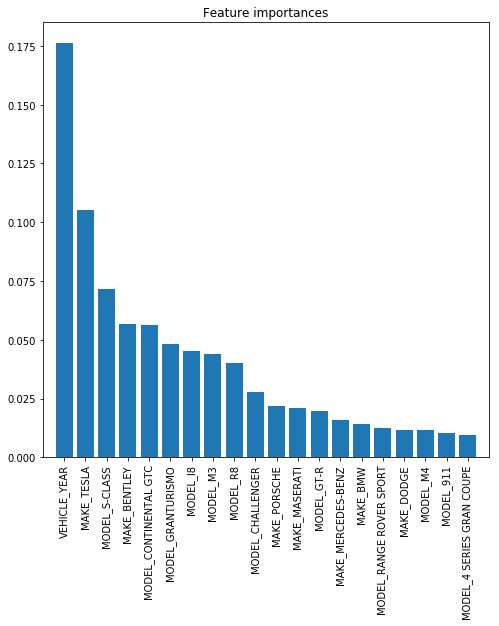

In [56]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns
d_first = 20
plt.figure(figsize=(8, 8))
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

<module 'matplotlib.pyplot' from '/home/greed/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

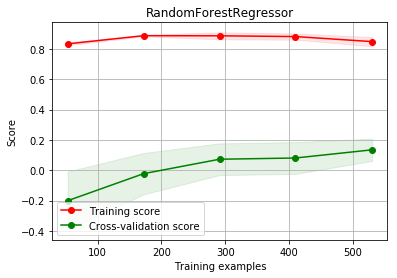

In [57]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(rf, 'RandomForestRegressor', X, y)

1.0 1.0


<module 'matplotlib.pyplot' from '/home/greed/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

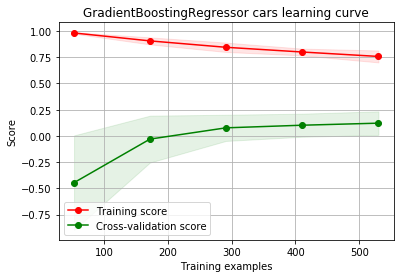

In [58]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingRegressor(n_estimators=100, random_state=11)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))
print (err_train, err_test)

plot_learning_curve(gbt, 'GradientBoostingRegressor cars learning curve', X, y)